In [1]:
import pandas as pd
import numpy as np

In [2]:
form1_file_path = './tbimsform1.csv'
form1_data = pd.read_csv(form1_file_path)
form1_data.describe()

,Unnamed: 0,Version,DataFrom,DataMethod,Sex,Race,Ethnicity,RaceWht,RaceAsn,RaceInd,...,cntLOCSameIndex,cntLOCBefore15yr,YoungestAgeLOC,cntModSevInjuries,cntModSevBeforeIndex,cntModSevAfterIndex,cntModSevSameIndex,cntModSevBefore15yr,RURALadm,RURALdc
count,16134.000000,16134.000000,757.000000,757.000000,16128.000000,16126.000000,11419.000000,11411.000000,11350.000000,11347.000000,...,12413.000000,12413.000000,1754.000000,12414.000000,12413.000000,12413.000000,12413.000000,12413.000000,13788.000000,13742.000000
mean,8067.500000,10.192829,5.825627,6.143989,1.735739,1.752201,1.232245,1.838577,1.153568,1.159690,...,0.007250,0.048900,25.046750,0.045271,0.031016,0.011440,0.001289,0.008781,2.013780,2.039951
std,4657.628957,5.069536,20.789223,19.918462,0.444873,1.383127,0.909270,0.921011,0.934800,0.945018,...,0.089466,0.258487,17.030327,0.249798,0.207237,0.115777,0.035881,0.099969,0.749332,0.747169
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4034.250000,9.100000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,8067.500000,11.300000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,12100.750000,14.100000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,32.750000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,16134.000000,16.100000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,2.000000,6.000000,95.000000,7.000000,6.000000,3.000000,1.000000,3.000000,3.000000,3.000000


In [3]:
form1_data.columns

Index(['Unnamed: 0', 'UID', 'Version', 'DataFrom', 'DataMethod', 'Sex', 'Race',
       'Ethnicity', 'RaceWht', 'RaceAsn',
       ...
       'cntLOCSameIndex', 'cntLOCBefore15yr', 'YoungestAgeLOC',
       'cntModSevInjuries', 'cntModSevBeforeIndex', 'cntModSevAfterIndex',
       'cntModSevSameIndex', 'cntModSevBefore15yr', 'RURALadm', 'RURALdc'],
      dtype='object', length=266)

In [4]:
form_data = form1_data[pd.notnull(form1_data['CTFrag'])]
form_data = form_data[pd.notnull(form_data['CTPunctate'])]
form_data = form_data[pd.notnull(form_data['SCI'])]
final = form_data[pd.notnull(form_data['CT7c1AxialLNS'])]
final = final[pd.notnull(final['CT5b3CorticalNTemp'])]
final = final[pd.notnull(final['CT7c1AxialLNS'])]
final = final[pd.notnull(final['CT5b1CorticalLTemp'])]



In [5]:
features = ['DAYStoREHABadm', 'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CT5a1CorticalLFront', 'CT5a2CorticalRFront', 'CT5a3CorticalNFront', 'CT5b1CorticalLTemp', 'CT5b2CorticalRTemp', 'CT5b3CorticalNTemp', 'CT5c1CorticalLPar', 'CT5c2CorticalRPar', 'CT5c3CorticalNPar', 'CT5d1CorticalLOcc', 'CT5d2CorticalROcc', 'CT5d3CorticalNOcc', 'CT5e1CorticalLUnk', 'CT5e2CorticalRUnk', 'CT5e3CorticalNUnk', 'CT6aNonCortL', 'CT6aNonCortR', 'CT6aNonCortN', 'CT7a1AxialLEpi', 'CT7a2AxialREpi', 'CT7a3AxialNEpi', 'CT7b1AxialLSub', 'CT7b2AxialRSub', 'CT7b3AxialNSub', 'CT7c1AxialLNS', 'CT7c2AxialRNS', 'CT7c3AxialNNS', 'CT7d1FalcineSub', 'CT7d2FalcineSAH', 'CT7d3FalcineUnk', 'CTFrag', 'SCI']
# add more continuous features? Add CT score thing as a Binary variable?
for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
y = X.DAYStoREHABadm # we now have consistent filtering!
needLater = X.DAYStoREHABadm
X = X.drop(columns="DAYStoREHABadm")



In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['DAYStoREHABadm', 'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CT5a1CorticalLFront', 'CT5a2CorticalRFront', 'CT5a3CorticalNFront', 'CT5b1CorticalLTemp', 'CT5b2CorticalRTemp', 'CT5b3CorticalNTemp', 'CT5c1CorticalLPar', 'CT5c2CorticalRPar', 'CT5c3CorticalNPar', 'CT5d1CorticalLOcc', 'CT5d2CorticalROcc', 'CT5d3CorticalNOcc', 'CT5e1CorticalLUnk', 'CT5e2CorticalRUnk', 'CT5e3CorticalNUnk', 'CT6aNonCortL', 'CT6aNonCortR', 'CT6aNonCortN', 'CT7a1AxialLEpi', 'CT7a2AxialREpi', 'CT7a3AxialNEpi', 'CT7b1AxialLSub', 'CT7b2AxialRSub', 'CT7b3AxialNSub', 'CT7c1AxialLNS', 'CT7c2AxialRNS', 'CT7c3AxialNNS', 'CT7d1FalcineSub', 'CT7d2FalcineSAH', 'CT7d3FalcineUnk', 'CTFrag', 'SCI']
for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
y = X.DAYStoREHABadm # we now have consistent filtering!
needLater = X.DAYStoREHABadm
X = X.drop(columns="DAYStoREHABadm")
original = X
minAccuracyScore = 2334
maxEffect = 0
print(len(features))
y = needLater
# converting all DAYStoREHABadm values to 0 if <27 and 1 otherwise
y = pd.cut(y, [-1, 27, 1000], labels=False) + 1


37


In [7]:
# {'CT5a1CorticalLFront': 1, 'CTIntraventricular': 1, 'CT7a3AxialNEpi': 7, 'CTPunctate': 10, 'CT5b3CorticalNTemp': 8,
#  'CT5b2CorticalRTemp': 26,
#  'CT5a3CorticalNFront': 5, 'CT6aNonCortN': 184, 'CT7d3FalcineUnk': 162, 'CT5d1CorticalLOcc': 96}
# {'CT7d3FalcineUnk': 1, 'CT5e2CorticalRUnk': 65, 'CT7c1AxialLNS': 18, 'CT6aNonCortR': 10, 'CT5e3CorticalNUnk': 8,
#  'CTIntraventricular': 168, 'CT7a1AxialLEpi': 60, 'CT7b3AxialNSub': 170}

# we need to clean up the dataset - take away all datapoints that contain even a single 0 in the features that we are looking at
X = X.dropna(axis=0)
X = X.astype('int64')
X.describe()

,CTIntracrain,CTPunctate,CTSubarachnioid,CTIntraventricular,CT5a1CorticalLFront,CT5a2CorticalRFront,CT5a3CorticalNFront,CT5b1CorticalLTemp,CT5b2CorticalRTemp,CT5b3CorticalNTemp,...,CT7b2AxialRSub,CT7b3AxialNSub,CT7c1AxialLNS,CT7c2AxialRNS,CT7c3AxialNNS,CT7d1FalcineSub,CT7d2FalcineSAH,CT7d3FalcineUnk,CTFrag,SCI
count,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,...,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000
mean,2.025980,1.378803,1.770314,1.402842,1.518655,1.510079,1.168086,1.389508,1.379742,1.165081,...,1.455741,1.197696,1.177726,1.180606,1.168712,0.146175,0.120821,0.119006,1.244648,1.058595
std,1.122615,1.244756,1.217125,1.240521,1.245588,1.244279,1.195624,1.240818,1.238495,1.194839,...,1.244991,1.203765,1.197109,1.199082,1.195798,0.545304,0.481344,0.476110,1.267213,0.348967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
y.describe() # y is the prediction variable

count    15974.000000
mean         1.232628
std          0.422520
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [9]:
y = needLater
y = pd.cut(y, [-1, 27, 1000], labels=False) + 1
y.describe()

count    15974.000000
mean         1.232628
std          0.422520
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

days_model = LogisticRegression(max_iter=10000, random_state=0)
y_pred = days_model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total of %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy_score(y_test,y_pred)

(12779, 36) (12779,)
(3195, 36) (3195,)


/Users/shashankrammoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of mislabeled points out of a total of 3195 points: 785


0.7543035993740219

In [11]:
# a Naive Bayes classifier, alternative to Logistic regression
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7549295774647887

In [12]:
# not relevant
from sklearn.metrics import mean_absolute_error
predicted_time = days_model.predict(X)
mean_absolute_error(y, predicted_time)

0.23256541880555903


Plan of action:
* One-hot encoding - converts categorical variables to binary variables
* Still need to find a way to deal with ordinal variables
* Missing data can be encoded as a 0 on all the binary variables that result
* Then use argmax
* tfjs seems really cool, maybe consider that?
* treating unknown variables as any other category for now

In [22]:
# now we are looking at non-binary variables, and will eventually combine one-hot encoded 
# categorical variables with binary variables to create one huge feature list

features = ['SCI',
            'Craniotomy',
'GCSTot',
'Race',
'Sex',
'AcutePay1',
'DRINKCat',
'Drugs',
'BMICat',
'DAYStoREHABadm']

for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
for variable in features[:-1]:
    m = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, m], axis=1)
X.head()

,SCI,Craniotomy,GCSTot,Race,Sex,AcutePay1,DRINKCat,Drugs,BMICat,DAYStoREHABadm,...,Drugs_9.0,BMICat_1,BMICat_2,BMICat_3,BMICat_4,BMICat_5,BMICat_6,BMICat_7,BMICat_8,BMICat_9
1,1.0,1.0,15.0,1.0,2.0,2.0,3,1.0,4,12.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,11.0,1.0,2.0,2.0,1,1.0,9,5.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,6.0,2.0,2.0,2.0,3,1.0,9,33.0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,11.0,2.0,2.0,10.0,3,2.0,9,24.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,4.0,77.0,1.0,2.0,1.0,2,1.0,9,25.0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X = X.drop('Sex', axis=1)

In [24]:
for variable in features:
    if variable in X and variable != 'DAYStoREHABadm':
        X = X.drop(variable, axis=1)

In [25]:
X.head()

,DAYStoREHABadm,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,Craniotomy_6.0,Craniotomy_9.0,...,Drugs_9.0,BMICat_1,BMICat_2,BMICat_3,BMICat_4,BMICat_5,BMICat_6,BMICat_7,BMICat_8,BMICat_9
1,12.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,25.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X.describe()

,DAYStoREHABadm,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,Craniotomy_6.0,Craniotomy_9.0,...,Drugs_9.0,BMICat_1,BMICat_2,BMICat_3,BMICat_4,BMICat_5,BMICat_6,BMICat_7,BMICat_8,BMICat_9
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,20.528742,0.949694,0.049253,0.001054,0.605320,0.115954,0.074933,0.018898,0.182459,0.002436,...,0.018634,0.000856,0.001119,0.008692,0.122539,0.099295,0.043787,0.013037,0.006585,0.704089
std,17.402461,0.218583,0.216402,0.032442,0.488798,0.320181,0.263291,0.136168,0.386235,0.049300,...,0.135234,0.029246,0.033439,0.092826,0.327918,0.299068,0.204629,0.113439,0.080880,0.456466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:

dropThese = ['Craniotomy_6.0', 'Craniotomy_9.0', 'BMICat_9',
'GCSTot_77.0',
'GCSTot_88.0',
'Race_7.0',
'Race_9.0',
'Sex_9.0',
'Drugs_7.0',
'Drugs_9.0',
'AcutePay1_99.0']
newCols = X.drop(dropThese, axis=1)


In [28]:
newCols.describe()

,DAYStoREHABadm,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,...,Drugs_1.0,Drugs_2.0,BMICat_1,BMICat_2,BMICat_3,BMICat_4,BMICat_5,BMICat_6,BMICat_7,BMICat_8
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,20.528742,0.949694,0.049253,0.001054,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,...,0.763219,0.201554,0.000856,0.001119,0.008692,0.122539,0.099295,0.043787,0.013037,0.006585
std,17.402461,0.218583,0.216402,0.032442,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,...,0.425121,0.401174,0.029246,0.033439,0.092826,0.327918,0.299068,0.204629,0.113439,0.080880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
newCols = newCols.drop(['AcutePay1_55.0','AcutePay1_77.0','DRINKCat_9'], axis=1)
list(newCols)

['DAYStoREHABadm',
 'SCI_1.0',
 'SCI_2.0',
 'SCI_9.0',
 'Craniotomy_1.0',
 'Craniotomy_2.0',
 'Craniotomy_3.0',
 'Craniotomy_4.0',
 'GCSTot_3.0',
 'GCSTot_4.0',
 'GCSTot_5.0',
 'GCSTot_6.0',
 'GCSTot_7.0',
 'GCSTot_8.0',
 'GCSTot_9.0',
 'GCSTot_10.0',
 'GCSTot_11.0',
 'GCSTot_12.0',
 'GCSTot_13.0',
 'GCSTot_14.0',
 'GCSTot_15.0',
 'GCSTot_99.0',
 'Race_1.0',
 'Race_2.0',
 'Race_3.0',
 'Race_4.0',
 'Race_5.0',
 'Sex_1.0',
 'Sex_2.0',
 'AcutePay1_1.0',
 'AcutePay1_2.0',
 'AcutePay1_3.0',
 'AcutePay1_4.0',
 'AcutePay1_7.0',
 'AcutePay1_8.0',
 'AcutePay1_10.0',
 'AcutePay1_14.0',
 'AcutePay1_88.0',
 'DRINKCat_0',
 'DRINKCat_1',
 'DRINKCat_2',
 'DRINKCat_3',
 'Drugs_0.0',
 'Drugs_1.0',
 'Drugs_2.0',
 'BMICat_1',
 'BMICat_2',
 'BMICat_3',
 'BMICat_4',
 'BMICat_5',
 'BMICat_6',
 'BMICat_7',
 'BMICat_8']

In [30]:
# add binary variables to newCols
newCols = newCols.join(original)

In [31]:
newCols.describe()

,DAYStoREHABadm,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,...,CT7b2AxialRSub,CT7b3AxialNSub,CT7c1AxialLNS,CT7c2AxialRNS,CT7c3AxialNNS,CT7d1FalcineSub,CT7d2FalcineSAH,CT7d3FalcineUnk,CTFrag,SCI
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,20.528742,0.949694,0.049253,0.001054,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,...,1.437150,1.173372,1.154343,1.156911,1.144861,0.149931,0.123527,0.121617,1.215184,1.057681
std,17.402461,0.218583,0.216402,0.032442,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,...,1.154095,1.103212,1.095716,1.097903,1.094005,0.534569,0.466461,0.460788,1.152554,0.336688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [32]:
list(newCols)

['DAYStoREHABadm',
 'SCI_1.0',
 'SCI_2.0',
 'SCI_9.0',
 'Craniotomy_1.0',
 'Craniotomy_2.0',
 'Craniotomy_3.0',
 'Craniotomy_4.0',
 'GCSTot_3.0',
 'GCSTot_4.0',
 'GCSTot_5.0',
 'GCSTot_6.0',
 'GCSTot_7.0',
 'GCSTot_8.0',
 'GCSTot_9.0',
 'GCSTot_10.0',
 'GCSTot_11.0',
 'GCSTot_12.0',
 'GCSTot_13.0',
 'GCSTot_14.0',
 'GCSTot_15.0',
 'GCSTot_99.0',
 'Race_1.0',
 'Race_2.0',
 'Race_3.0',
 'Race_4.0',
 'Race_5.0',
 'Sex_1.0',
 'Sex_2.0',
 'AcutePay1_1.0',
 'AcutePay1_2.0',
 'AcutePay1_3.0',
 'AcutePay1_4.0',
 'AcutePay1_7.0',
 'AcutePay1_8.0',
 'AcutePay1_10.0',
 'AcutePay1_14.0',
 'AcutePay1_88.0',
 'DRINKCat_0',
 'DRINKCat_1',
 'DRINKCat_2',
 'DRINKCat_3',
 'Drugs_0.0',
 'Drugs_1.0',
 'Drugs_2.0',
 'BMICat_1',
 'BMICat_2',
 'BMICat_3',
 'BMICat_4',
 'BMICat_5',
 'BMICat_6',
 'BMICat_7',
 'BMICat_8',
 'CTIntracrain',
 'CTPunctate',
 'CTSubarachnioid',
 'CTIntraventricular',
 'CT5a1CorticalLFront',
 'CT5a2CorticalRFront',
 'CT5a3CorticalNFront',
 'CT5b1CorticalLTemp',
 'CT5b2CorticalRTemp',

In [33]:
#redefining y
y = newCols['DAYStoREHABadm']
y.describe()

count    15187.000000
mean        20.528742
std         17.402461
min          0.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        256.000000
Name: DAYStoREHABadm, dtype: float64

In [34]:
x = newCols.drop('DAYStoREHABadm', axis=1)
x.describe()

,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,...,CT7b2AxialRSub,CT7b3AxialNSub,CT7c1AxialLNS,CT7c2AxialRNS,CT7c3AxialNNS,CT7d1FalcineSub,CT7d2FalcineSAH,CT7d3FalcineUnk,CTFrag,SCI
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,0.949694,0.049253,0.001054,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,0.013103,...,1.437150,1.173372,1.154343,1.156911,1.144861,0.149931,0.123527,0.121617,1.215184,1.057681
std,0.218583,0.216402,0.032442,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,0.113721,...,1.154095,1.103212,1.095716,1.097903,1.094005,0.534569,0.466461,0.460788,1.152554,0.336688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [35]:
# y = pd.cut(y, [-1, 5, 15, 20, 27, 1000], labels=False) + 1
y.head()
y.describe()

count    15187.000000
mean        20.528742
std         17.402461
min          0.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        256.000000
Name: DAYStoREHABadm, dtype: float64

In [36]:
y = newCols['DAYStoREHABadm']
y = pd.cut(y, [-1,27,1000], labels=False) + 1
y.describe()

count    15187.000000
mean         1.228485
std          0.419870
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

days_model = LogisticRegression(random_state=0, max_iter=10000)

y_pred = days_model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total of %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy_score(y_test,y_pred)

(10630, 88) (10630,)
(4557, 88) (4557,)


/Users/shashankrammoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of mislabeled points out of a total of 4557 points: 1019


0.7763879745446566

In [38]:
coef = days_model.coef_[0]
# these numbers seem to change slightly each time, I'm going to try standardizing this
coef

array([-0.3767238 ,  0.30811975, -0.02270676,  0.01705968, -0.02273365,
        0.56552279,  0.93192231,  0.38443899,  0.25051221, -0.18173129,
       -0.0389611 , -0.24468541, -0.3986443 , -0.6614353 , -0.52747159,
       -0.51926861, -0.78488757, -1.18265514, -1.1727382 , -1.17306307,
       -0.49414011, -0.23669751, -0.05192868, -0.21900693, -0.64850249,
       -0.03783514, -0.12106376,  0.05459288, -0.67742499,  0.11862832,
       -0.17777504, -0.38926522, -0.26765131, -0.13456307,  0.0103882 ,
       -0.11195233,  0.        , -0.10575091, -0.28429933, -0.19276847,
       -0.13642362, -0.54426421, -0.20659041, -0.26505321, -0.03015273,
        0.31089564,  0.04419781, -0.24059588, -0.13008803,  0.00887357,
        0.04620122,  0.35859237, -0.25439405,  0.02033022,  0.04918162,
        0.41347907,  0.0836288 ,  0.04189447,  0.21434368,  0.19369381,
       -0.08025282, -1.13969279,  0.08166264,  0.09668758,  0.15834887,
        0.20909588,  0.16004656, -1.46425736, -0.04085233, -0.19

In [39]:
x.describe()

,SCI_1.0,SCI_2.0,SCI_9.0,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,...,CT7b2AxialRSub,CT7b3AxialNSub,CT7c1AxialLNS,CT7c2AxialRNS,CT7c3AxialNNS,CT7d1FalcineSub,CT7d2FalcineSAH,CT7d3FalcineUnk,CTFrag,SCI
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,0.949694,0.049253,0.001054,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,0.013103,...,1.437150,1.173372,1.154343,1.156911,1.144861,0.149931,0.123527,0.121617,1.215184,1.057681
std,0.218583,0.216402,0.032442,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,0.113721,...,1.154095,1.103212,1.095716,1.097903,1.094005,0.534569,0.466461,0.460788,1.152554,0.336688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [40]:

print("most positive effect:")
largest = np.argsort(-coef)[:3]
for i in largest:
    print(list(x)[i])

mostNegative = np.argsort(coef)[:3]
print("most negative:")
for i in mostNegative:
    print(list(x)[i])

# top five negative weights

# top five by absolute value

most positive effect:
Craniotomy_4.0
Craniotomy_3.0
CT6aNonCortN
most negative:
CT5d3CorticalNOcc
GCSTot_13.0
GCSTot_15.0


In [41]:
list(x)

['SCI_1.0',
 'SCI_2.0',
 'SCI_9.0',
 'Craniotomy_1.0',
 'Craniotomy_2.0',
 'Craniotomy_3.0',
 'Craniotomy_4.0',
 'GCSTot_3.0',
 'GCSTot_4.0',
 'GCSTot_5.0',
 'GCSTot_6.0',
 'GCSTot_7.0',
 'GCSTot_8.0',
 'GCSTot_9.0',
 'GCSTot_10.0',
 'GCSTot_11.0',
 'GCSTot_12.0',
 'GCSTot_13.0',
 'GCSTot_14.0',
 'GCSTot_15.0',
 'GCSTot_99.0',
 'Race_1.0',
 'Race_2.0',
 'Race_3.0',
 'Race_4.0',
 'Race_5.0',
 'Sex_1.0',
 'Sex_2.0',
 'AcutePay1_1.0',
 'AcutePay1_2.0',
 'AcutePay1_3.0',
 'AcutePay1_4.0',
 'AcutePay1_7.0',
 'AcutePay1_8.0',
 'AcutePay1_10.0',
 'AcutePay1_14.0',
 'AcutePay1_88.0',
 'DRINKCat_0',
 'DRINKCat_1',
 'DRINKCat_2',
 'DRINKCat_3',
 'Drugs_0.0',
 'Drugs_1.0',
 'Drugs_2.0',
 'BMICat_1',
 'BMICat_2',
 'BMICat_3',
 'BMICat_4',
 'BMICat_5',
 'BMICat_6',
 'BMICat_7',
 'BMICat_8',
 'CTIntracrain',
 'CTPunctate',
 'CTSubarachnioid',
 'CTIntraventricular',
 'CT5a1CorticalLFront',
 'CT5a2CorticalRFront',
 'CT5a3CorticalNFront',
 'CT5b1CorticalLTemp',
 'CT5b2CorticalRTemp',
 'CT5b3CorticalNTe

In [46]:
print(len(list(x)))

88


In [86]:
import matplotlib.pyplot as plt
def plot_bar_x():
    index = np.arange(len(list(x)))
    plt.barh(index, coef)
    plt.ylabel('Feature', fontsize=5)
    plt.xlabel('Weight', fontsize=5)
    plt.yticks(index, list(x), fontsize=5, rotation=0)
    plt.title('Might be a good visualization')
    plt.rcParams["figure.figsize"] = (20,15)
    plt.show()

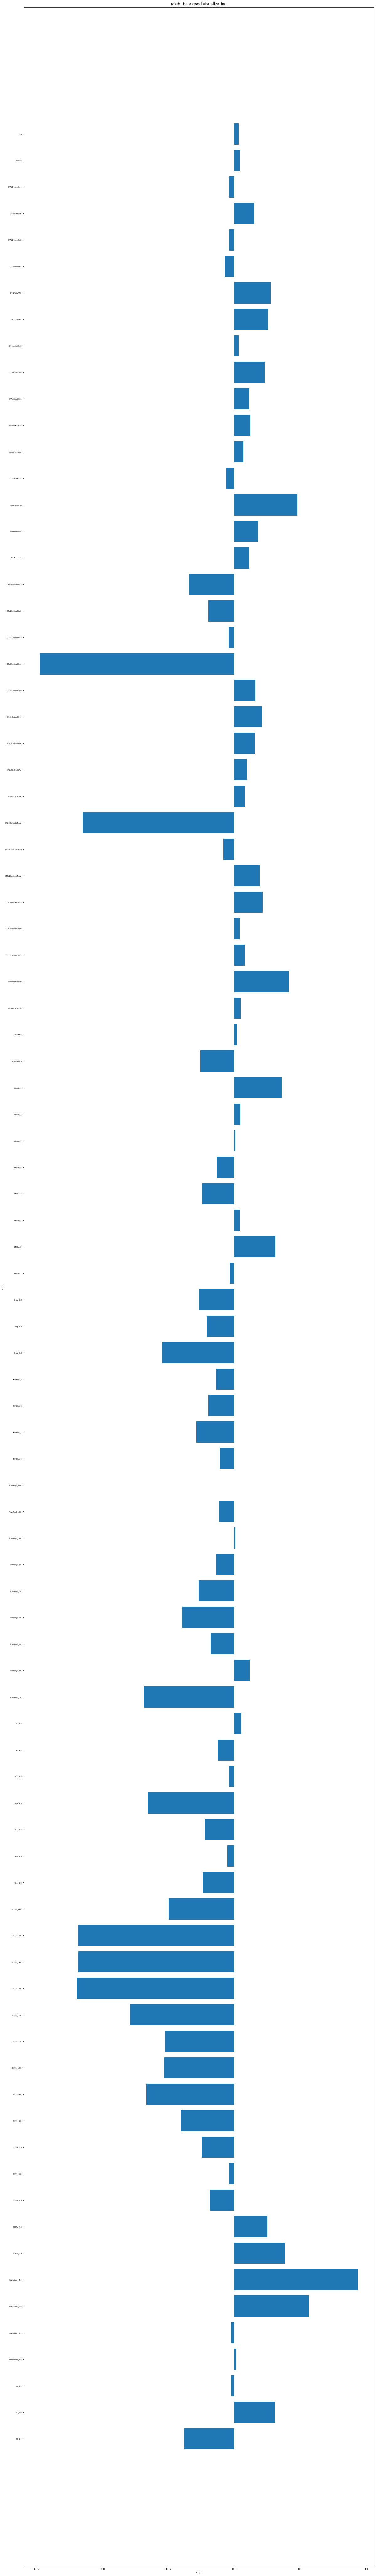

In [87]:
plot_bar_x()

In [42]:
import eli5
eli5.show_weights(days_model)

In [ ]:
# ignore everything beyond this

In [ ]:


# from tqdm import tqdm

# def fixData(filename):
#     data = pd.read_csv(filename, header = None)
#     data = data.to_numpy()
#     data = convertToNumbers(data)
#     return data

# def convertToNumbers(dataFrame):
#     numLines = int(dataFrame[1][0])
#     numFeatures = int(dataFrame[0][0])
#     emptyArray = np.zeros((numLines, numFeatures + 1))
#     for a in range(numLines):
#         elem = dataFrame[a+2][0]
#         elem = re.sub('[^A-Za-z0-9]+', '', elem)
#         for i in range(len(elem)):
#             emptyArray[a][i] = int(elem[i])
#     array = emptyArray.astype(int)
#     return array


# def prod(thetas, x):
#     # we want theta_1 * x_1 + ... 
#     sum = 0

#     for i in range(len(x)):
#         sum += thetas[i] * x[i]
#         # print(sum)
#     return sum

# def logisticReg(data):
#     #initialize step
#     numFeatures = len(data[0])
#     thetas = np.zeros(numFeatures) #this contains theta0
#     print("thetas", len(thetas)) 
#     step = 0.0001
#     allYs = np.zeros(len(data))
#     i = 0
#     for elem in data:
#         allYs[i] = elem[-1]
#         i += 1
#     #x0 should be 1 and theta0 is 0
#     allXs = np.ones((len(data), len(data[0])))
#     i = 0
#     for elem in data:
#         allXs[i,1:] = elem[:-1]
#         i += 1
#     print ("allXs ", allXs)
#     #take
#     # repeat many times
#     for i in range(10000):
#         print(i)
#         gradients = np.zeros(numFeatures)
        
#         for num in range(len(allXs)): # until the last element?
#             x = allXs[num] # array
#             y = allYs[num] #number
#             cache = (1/(1+math.exp(-1*np.dot(thetas, x))))
#             # print("cache ", cache)
#             # gradients += x * (allYs - cache)
#             # for j in range(len(thetas)): # for each param j
#             #     gradients[j] += x[j] * (y - cache)
#             gradients += x * (y - cache)
#         thetas += step* gradients
#     print("step size ", step)
#     return (thetas)

# def sigmoid(x, weights):
#   z = weights[0] + np.dot(weights[1:], x)
#   return 1 / (1 + math.exp(-z))

# def log_likelihood(className, features, weights):
#     scores = np.dot(features, weights)
#     ll = np.sum( className*scores - np.log(1 + np.exp(scores)) )
#     return ll


# # print("log_likelihood(1, netflix_train, logisticReg(netflix_train))", log_likelihood(1, netflix_train, logisticReg(netflix_train)))

# def predLog(data, weights):
#     accuracy = 0
#     print("weights are ", weights)
#     for row in tqdm(data):
#         print(row)
#         pY1 = sigmoid(row[:-1], weights)
#         if pY1 > 0.5:
#             prediction = 1
#         else:
#             prediction = 0
        
#         if prediction == row[-1]:
#             accuracy += 1
#     print(accuracy/len(data))

# # #P(Y = 1 | X=x) is 

# # we get 100% accuracy with this
# simple_train = X_train
# simple_test = X_test

# print(predLog(X_test, logisticReg(X_train)))
# # print(predLog(netflix_test))
# #pred(netflix_test)

In [ ]:
# maxEffects = {} # the most frequent element in this is likely the biggest factor?
# # loop through the data, and see what correlates with what
# for feature in features[1:]:
#     X_v = X[feature]
#     X_v = X_v.values
#     y_v = y.values
#     correct = 0
#     for i in tqdm(range(len(X_v))):
#         if X_v[i] == y_v[i]:
#             correct += 1
#     maxEffects[feature] = (correct/len(X_v)) * 100
# print(maxEffects)
# # find max
# maximum = 0
# elem = 0
# # for element in maxEffects:
# #     if maxEffects[element] > maximum:
# #         maximum = maxEffects[element]
# #         elem = element
        
# # SCI 12020 is max

# # CT5d3CorticalNOcc 11709


# del(maxEffects["SCI"])
# # CT7d3FalcineUnk 11709
# for element in maxEffects:
#     if maxEffects[element] > maximum:
#         print("new max is " + element + str(maxEffects[element]))
#         maximum = maxEffects[element]
#         elem = element
# print("max is " + str(maximum) + element)